In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer 

In [2]:
links_df = pd.read_csv("data/links.csv")
links_df = links_df.dropna(subset=["tmdbId"])
links_df = links_df.astype({"tmdbId": int})

In [3]:
movies_df = pd.read_csv("data/movies_metadata.csv")
movies_df = movies_df.rename(columns={"id": "tmdbId"})
movies_df = movies_df[movies_df["tmdbId"].str.isnumeric()]
movies_df = movies_df.astype({"tmdbId": int})
movies_df = pd.merge(movies_df, links_df[["tmdbId", "movieId"]], on="tmdbId")
movies_df = movies_df.drop(columns=["tmdbId", "imdb_id"])

/var/folders/gh/zfs73sfd0g98hhvh3pghq3w80000gn/T/ipykernel_96822/2268137487.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("data/movies_metadata.csv")


In [4]:
credits_df = pd.read_csv("data/credits.csv")
credits_df = credits_df.rename(columns={"id": "tmdbId"})
credits_df = credits_df.dropna(subset=["tmdbId"])
credits_df = pd.merge(credits_df, links_df[["tmdbId", "movieId"]], on="tmdbId")
credits_df = credits_df.drop(columns=["tmdbId"])

In [5]:
ratings_df = pd.read_csv("data/ratings_small.csv")
movies = ratings_df["movieId"].unique()

In [6]:
movies_df = movies_df[movies_df.movieId.isin(movies)]
movies_df = movies_df.dropna(subset=["overview"])
movies_df = movies_df[movies_df["overview"] != "No overview found."]
movies_df = movies_df.drop_duplicates()

In [7]:
movies_df

,adult,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,poster_path,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39835,False,"{'id': 286023, 'name': 'Sharknado Collection',...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",http://www.syfy.com/sharknado4,en,Sharknado 4: The 4th Awakens,The new installment of the Sharknado franchise...,4.574494,/jcP3HFXF1BIW9LmBrDusbbDZjBG.jpg,...,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"What happens in Vegas, stays in Vegas. Unless ...",Sharknado 4: The 4th Awakens,False,4.3,88.0,161918
39848,False,NaN,8000000,"[{'id': 18, 'name': 'Drama'}]",NaN,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,/yWp7PgydSlxlhl7benKhTnCvRjN.jpg,...,0.0,85.0,[],Released,NaN,The Last Brickmaker in America,False,7.0,1.0,161944
40068,False,NaN,1000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 10749,...",NaN,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333139,/q1lrN6ZrIsOs077lQB86aPGKZRF.jpg,...,0.0,150.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Decorated Officer. Devoted Family Man. Defendi...,Rustom,False,7.3,25.0,162542
40121,False,NaN,15050000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,/q2XVemXiWSa18mbaVpI3rbLXG2u.jpg,...,16180000.0,155.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mohenjo Daro,False,6.7,26.0,162672


In [8]:
movies_df.to_csv("generated_data/movies_small.csv", index=False)

In [9]:
credits_df = credits_df[credits_df.movieId.isin(movies)]
credits_df = credits_df.drop_duplicates()

In [10]:
credits_df

,cast,crew,movieId
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",3
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",4
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",5
...,...,...,...
39849,"[{'cast_id': 0, 'character': 'Fin Shepard', 'c...","[{'credit_id': '56ffae0cc3a3686ea7001e00', 'de...",161918
39862,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de...",161944
40082,"[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de...",162542
40135,"[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de...",162672


In [11]:
credits_df.to_csv("generated_data/credits_small.csv", index=False)

In [12]:
# compute TFIDF matrix for movie overviews 
vectorizer = TfidfVectorizer(stop_words="english") # remove stop words)
matrix = vectorizer.fit_transform(movies_df["overview"])

In [13]:
# best value is roughly 50, can skip this cell in the future because it takes a long time to run
inertias = []
ks = np.arange(200) + 1

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(matrix)
    inertias.append(model.inertia_)

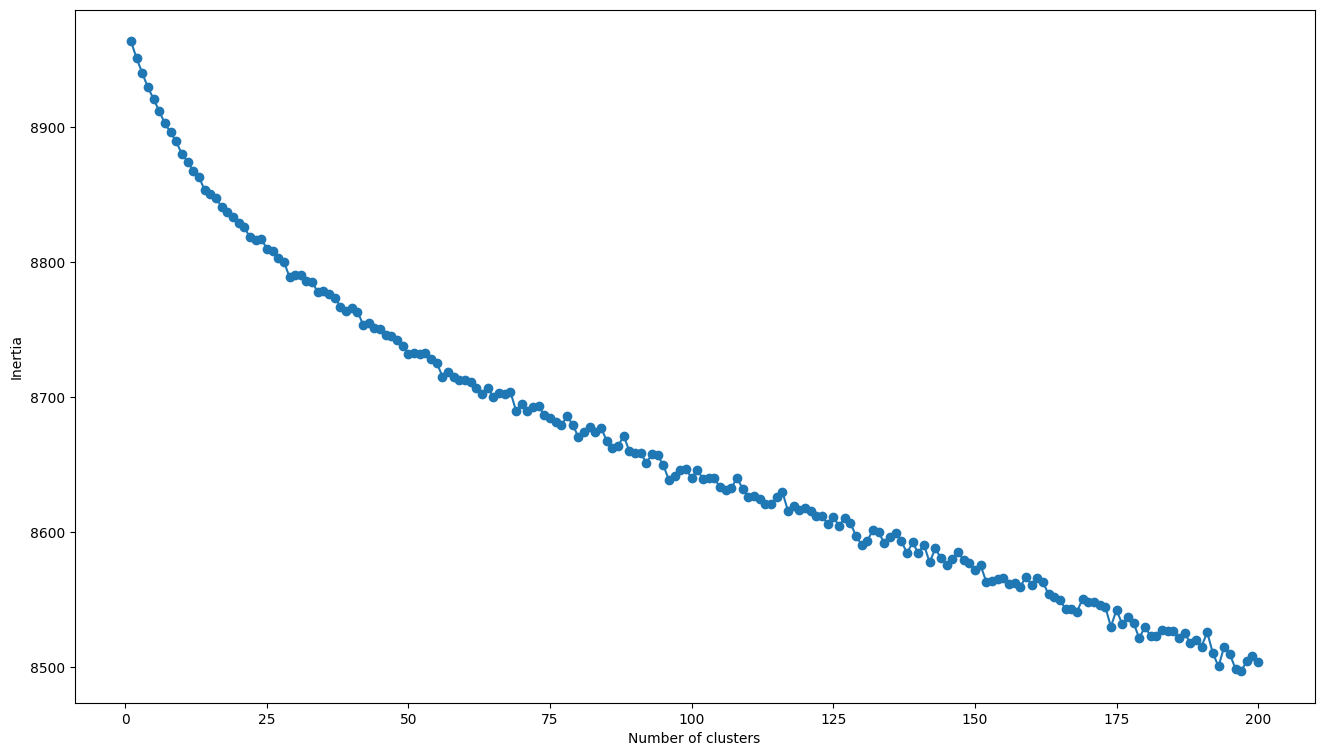

In [14]:
# plot inertias
fig, axes = plt.subplots(figsize=(16, 9))
plt.plot(ks, inertias, "-o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.savefig("images/inertia.jpg")

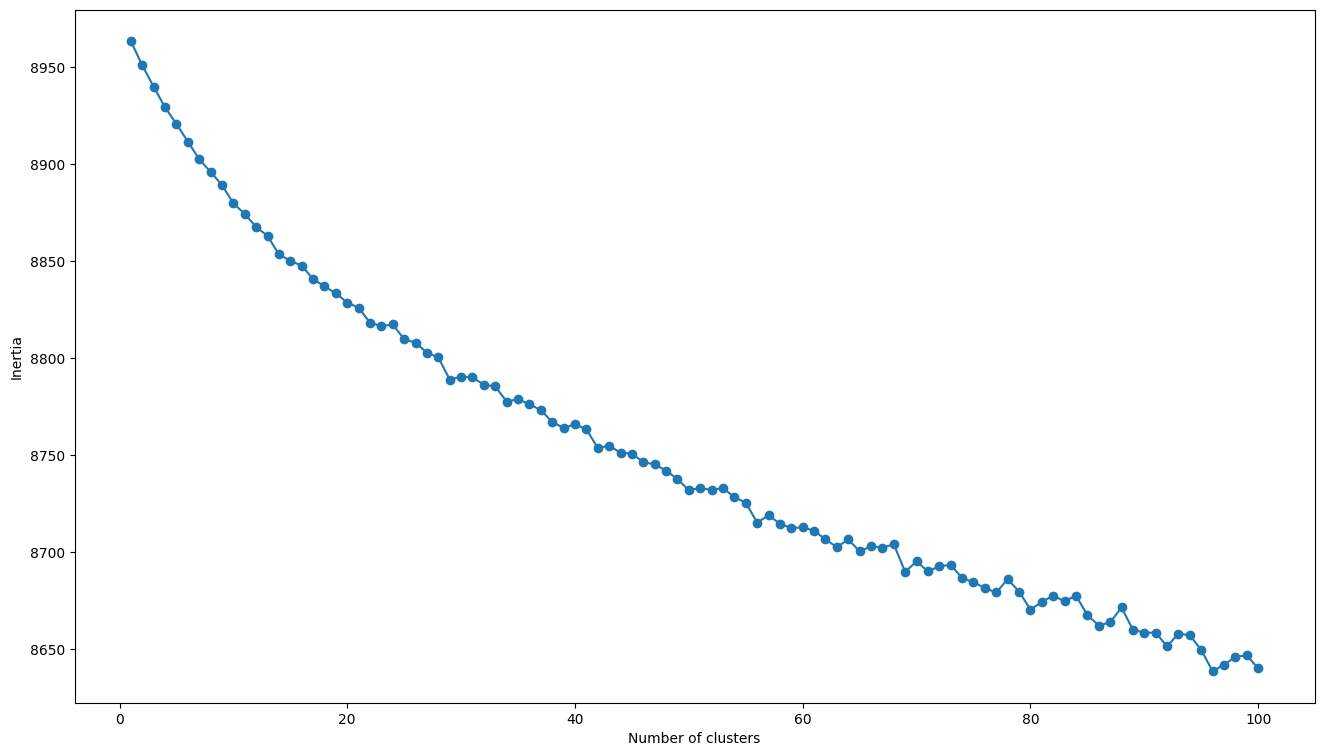

In [15]:
# plot inertias
fig, axes = plt.subplots(figsize=(16, 9))
plt.plot(ks[:100], inertias[:100], "-o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.savefig("images/inertia_zoomed_in.jpg")

In [16]:
model = KMeans(n_clusters=50)
model.fit(matrix)

KMeans(n_clusters=50)

In [17]:
movies_df["overview_cluster"] = model.predict(matrix)

In [18]:
movies_df["overview_cluster"].value_counts()

21    981
8     827
2     318
15    316
14    303
9     287
32    267
29    261
26    245
48    242
49    237
25    217
23    210
44    197
17    187
40    184
28    178
22    173
10    163
7     160
19    147
27    142
12    140
13    140
39    131
41    127
36    125
30    123
5     122
3     116
4     116
6     116
42    112
45    111
1     110
16    103
46    100
20     99
35     96
38     90
37     87
34     84
0      81
31     77
11     76
47     67
43     67
24     59
18     57
33     46
Name: overview_cluster, dtype: int64

In [23]:
movies_df.to_csv("generated_data/movies_small_with_clusters.csv", index=False) # save movies data with overview clusters

In [31]:
temp = movies_df.dropna(subset=["belongs_to_collection"])

In [32]:
temp[temp["belongs_to_collection"].str.contains("Harry Potter Collection")][["original_title", "overview", "overview_cluster"]]

,original_title,overview,overview_cluster
4783,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,33
5701,Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",33
7757,Harry Potter and the Prisoner of Azkaban,"Harry, Ron and Hermione return to Hogwarts for...",33
10593,Harry Potter and the Goblet of Fire,"Harry starts his fourth year at Hogwarts, comp...",33
11972,Harry Potter and the Order of the Phoenix,Returning for his fifth year of study at Hogwa...,33
13950,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",33
16195,Harry Potter and the Deathly Hallows: Part 1,"Harry, Ron and Hermione walk away from their l...",33
17509,Harry Potter and the Deathly Hallows: Part 2,"Harry, Ron and Hermione continue their quest t...",33
